This code inputs 'users.py' from Part 1 and returns data visualizations based on analysis of user information extracted from that input.
Output for this file is 3 PNG files, titled: 'numUsers_x_numPhotoUploads(Total).png', 'numUsers_x_numPhotoUploads(NonZero).png', and 'numPhotoUploads_x_numTotalInteracts.png'


In [1]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from users import users 

#assumes that PhotoUpload is an actual key from previous problem
user_uploads = []
for user in users:
    user_uploads.append(user['PhotoUpload'])
    
counts = dict(Counter(user_uploads))

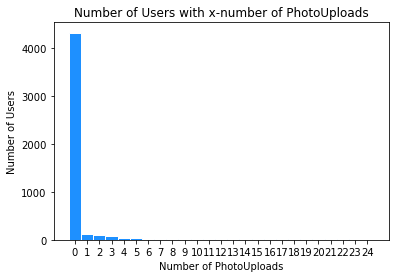

In [2]:
#create plot with all data
plt.bar(list(counts.keys()), counts.values(), width = 1, color ='dodgerblue', edgecolor = 'w')
plt.xticks(np.arange(0, max(list(counts.keys()))+1, 1.0))
plt.xlabel('Number of PhotoUploads')
plt.ylabel('Number of Users')
plt.title('Number of Users with x-number of PhotoUploads')
plt.grid(False)
plt.savefig('numUsers_x_numPhotoUploads(Total).png')
plt.show()

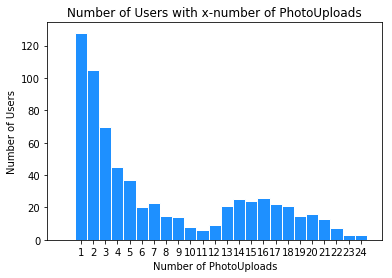

In [3]:
#create plot excluding those who never interacted with 'PhotoUpload'
nonzero_counts = counts.copy()
nonzero_counts[0] = 0  #reduce zero count to zero

plt.bar(list(nonzero_counts.keys()), nonzero_counts.values(), width = 1, color = 'dodgerblue', edgecolor = 'w')
plt.xticks(np.arange(1, max(list(nonzero_counts.keys()))+1, 1.0))
plt.xlabel('Number of PhotoUploads')
plt.ylabel('Number of Users')
plt.title('Number of Users with x-number of PhotoUploads')
plt.grid(False)
plt.savefig('numUsers_x_numPhotoUploads(NonZero).png')
plt.show()

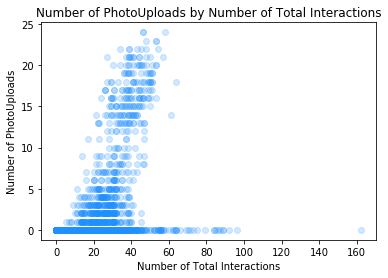

In [4]:
#create a modified copy of users collection
#this is sort of overkill, and time/space expensive, but it makes the code flexible for future purposes
users2 = []
for user in users:
    temp = dict.fromkeys(('user_id', 'PhotoUpload', 'TotalInteractions'))
    temp['user_id'] = user['user_id']
    temp['PhotoUpload'] = user['PhotoUpload']
    temp['TotalInteractions'] = sum(user.values()) - user['user_id']
    users2.append(temp)

#extract PhotoUploads and TotalInteractions and arrange them into lists
photo_uploads = [] #this will represent the number of photo uploads a given user has committed
total_interacts = [] #this will represent the total number of interactions a given user has committed
for user in users2:
    photo_uploads.append(user['PhotoUpload'])
    total_interacts.append(user['TotalInteractions'])


plt.scatter(total_interacts, photo_uploads, color = 'dodgerblue', alpha = 0.2)
plt.xlabel('Number of Total Interactions')
plt.ylabel('Number of PhotoUploads')
plt.title('Number of PhotoUploads by Number of Total Interactions')
plt.grid(False)
plt.savefig('numPhotoUploads_x_numTotalInteracts.png')
plt.show()